In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df1 = pd.read_csv(r'C:\Users\User\Downloads\order_info.csv')
df2=pd.read_csv(r'C:\Users\User\Downloads\order_line.csv')

mrg=pd.merge(df1,df2,on='Order ID', how='inner')
print(mrg.head())

   Order ID Customer ID Warehouse ID  Customer Age Customer Gender  \
0         1     CUST966        WH004            65          Female   
1         1     CUST966        WH004            65          Female   
2         1     CUST966        WH004            65          Female   
3         1     CUST966        WH004            65          Female   
4         1     CUST966        WH004            65          Female   

         Date   Product ID   SKU ID           Category  Quantity  \
0  2023-03-04  Product_110  SKU_291  Health & Wellness         4   
1  2023-03-04  Product_142  SKU_005  Health & Wellness         5   
2  2023-03-04  Product_197  SKU_151        Electronics         2   
3  2023-03-04  Product_195  SKU_945  Fashion & Apparel         1   
4  2023-03-04  Product_110  SKU_333  Health & Wellness         5   

   Price per Unit  
0          527.06  
1          847.13  
2          214.60  
3          513.50  
4          436.15  


In [4]:
count_unique=mrg['Customer ID'].nunique()
print(count_unique)

1000


In [5]:
unique_customers_df = mrg[['Customer ID']].drop_duplicates()
print(unique_customers_df.head())

   Customer ID
0      CUST966
9      CUST952
10     CUST987
15     CUST415
23     CUST160


In [7]:
df=mrg.copy()
df['order_value'] = df['Quantity'] * df['Price per Unit']
print(df.head())

   Order ID Customer ID Warehouse ID  Customer Age Customer Gender  \
0         1     CUST966        WH004            65          Female   
1         1     CUST966        WH004            65          Female   
2         1     CUST966        WH004            65          Female   
3         1     CUST966        WH004            65          Female   
4         1     CUST966        WH004            65          Female   

         Date   Product ID   SKU ID           Category  Quantity  \
0  2023-03-04  Product_110  SKU_291  Health & Wellness         4   
1  2023-03-04  Product_142  SKU_005  Health & Wellness         5   
2  2023-03-04  Product_197  SKU_151        Electronics         2   
3  2023-03-04  Product_195  SKU_945  Fashion & Apparel         1   
4  2023-03-04  Product_110  SKU_333  Health & Wellness         5   

   Price per Unit  order_value  
0          527.06      2108.24  
1          847.13      4235.65  
2          214.60       429.20  
3          513.50       513.50  
4    

In [8]:
average_order_value = df.groupby('Customer ID')['order_value'].mean()

print(average_order_value)

Customer ID
CUST001    1348.963721
CUST002    1353.771034
CUST003    1187.813929
CUST004    1382.176667
CUST005    1526.746667
              ...     
CUST995    1498.250769
CUST996    1559.702000
CUST997    1521.431957
CUST998    1255.387241
CUST999    1442.328182
Name: order_value, Length: 1000, dtype: float64


In [9]:
# Group by Customer ID and calculate average order_value
avg_order_value_per_customer = df.groupby('Customer ID', as_index=False)['order_value'].mean()

# Rename the column
avg_order_value_per_customer.rename(columns={'order_value': 'Average Order Value'}, inplace=True)

# Display the result
print(avg_order_value_per_customer.head())

  Customer ID  Average Order Value
0     CUST001          1348.963721
1     CUST002          1353.771034
2     CUST003          1187.813929
3     CUST004          1382.176667
4     CUST005          1526.746667


In [11]:
#  Group by Customer ID and calculate average order_value
avg_order_value = df.groupby('Customer ID', as_index=False)['order_value'].mean()
avg_order_value.rename(columns={'order_value': 'Average Order Value'}, inplace=True)

#  Get unique age and gender per customer (assuming they are constant per customer)
customer_info = df[['Customer ID', 'Customer Age', 'Customer Gender']].drop_duplicates(subset='Customer ID')

#  Merge average order value with customer info
merged_df = pd.merge(avg_order_value, customer_info, on='Customer ID', how='left')

# Display result
print(merged_df.head())

  Customer ID  Average Order Value  Customer Age Customer Gender
0     CUST001          1348.963721            24          Female
1     CUST002          1353.771034            35          Female
2     CUST003          1187.813929            26            Male
3     CUST004          1382.176667            25            Male
4     CUST005          1526.746667            29          Female


In [12]:
# Remove 'Customer ID' and 'Average Order Value' columns
merged_df = merged_df.drop(columns=['Customer ID'])

# Display the updated DataFrame
print(merged_df.head())

   Average Order Value  Customer Age Customer Gender
0          1348.963721            24          Female
1          1353.771034            35          Female
2          1187.813929            26            Male
3          1382.176667            25            Male
4          1526.746667            29          Female


In [13]:
# Group by Customer Age and Customer Gender
grouped_avg = merged_df.groupby(['Customer Age', 'Customer Gender'], as_index=False)['Average Order Value'].mean()

# Display result
print(grouped_avg.head())

   Customer Age Customer Gender  Average Order Value
0            18          Female          1314.141212
1            18            Male          1477.796747
2            19          Female          1415.048526
3            19            Male          1354.856382
4            20          Female          1445.373151


In [14]:
from sklearn.preprocessing import LabelEncoder

clustering_df = merged_df.copy()

# Encode 'Customer Gender'
le = LabelEncoder()
clustering_df['Customer Gender'] = le.fit_transform(clustering_df['Customer Gender'])

# Features for clustering
X = clustering_df[['Average Order Value', 'Customer Age', 'Customer Gender']]

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_df['Cluster_KMeans'] = kmeans.fit_predict(X)

# Agglomerative clustering with n_clusters=3
agglo = AgglomerativeClustering(n_clusters=3)
clustering_df['Cluster_Agglo'] = agglo.fit_predict(X)

# DBSCAN (you might need to tune eps & min_samples)
dbscan = DBSCAN(eps=300, min_samples=5)
clustering_df['Cluster_DBSCAN'] = dbscan.fit_predict(X)

# Check result
print(clustering_df.head())

   Average Order Value  Customer Age  Customer Gender  Cluster_KMeans  \
0          1348.963721            24                0               0   
1          1353.771034            35                0               0   
2          1187.813929            26                1               2   
3          1382.176667            25                1               0   
4          1526.746667            29                0               0   

   Cluster_Agglo  Cluster_DBSCAN  
0              1               0  
1              1               0  
2              1               0  
3              1               0  
4              1               0  


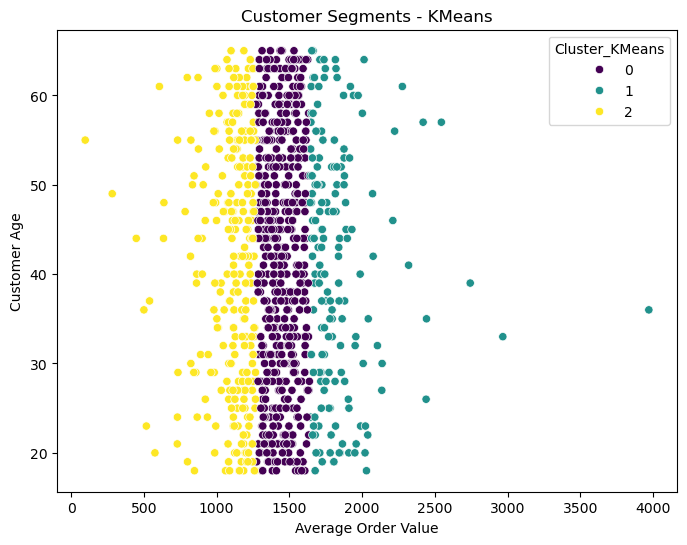

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Average Order Value',
    y='Customer Age',
    hue='Cluster_KMeans',
    palette='viridis',
    data=clustering_df
)
plt.title('Customer Segments - KMeans')
plt.show()

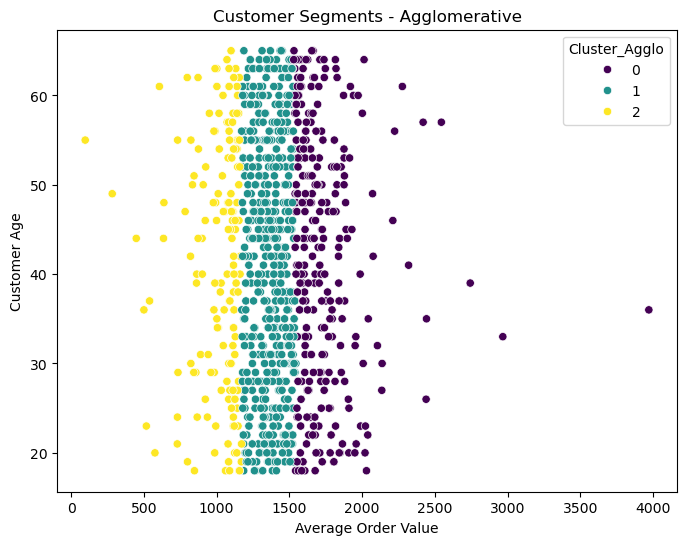

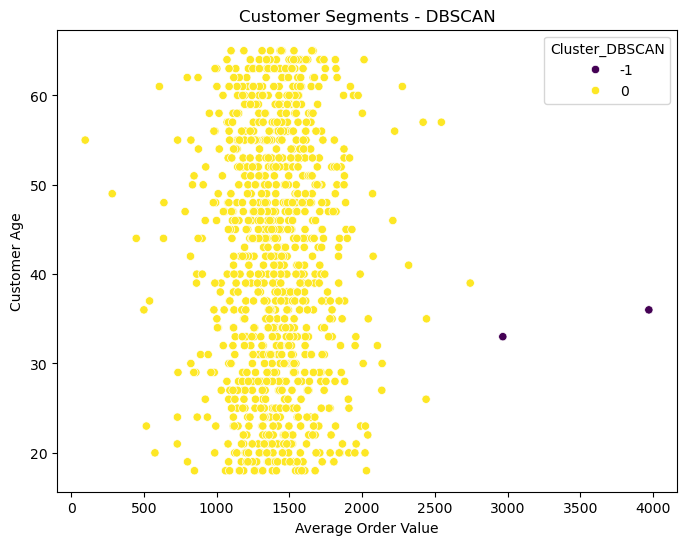

In [17]:
# Agglomerative
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Average Order Value',
    y='Customer Age',
    hue='Cluster_Agglo',
    palette='viridis',
    data=clustering_df
)
plt.title('Customer Segments - Agglomerative')
plt.show()

# DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Average Order Value',
    y='Customer Age',
    hue='Cluster_DBSCAN',
    palette='viridis',
    data=clustering_df
)
plt.title('Customer Segments - DBSCAN')
plt.show()

In [18]:
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
# AgglomerativeClustering and DBSCAN are not usually saved this way because they are deterministic & fast to re-fit.

In [19]:
new_gender_encoded = le.transform(['Male'])[0]
new_customer = [[1400, 25, new_gender_encoded]]
predicted_cluster = kmeans.predict(new_customer)
print(f"New customer belongs to KMeans cluster: {predicted_cluster[0]}")

New customer belongs to KMeans cluster: 0


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
